In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
import scipy.stats as stats


plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30,
    'figure.figsize' : (10,6)})
plt.rcParams.update({'font.size': 20})

# Fonctions definition

In [3]:
def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

def chi2(data,mu,var):
    return ((data-mu)**2/var).sum()

def pdf_unormalized(x,alpha=30):
    return np.sqrt(x)/(np.exp((x-alpha))+1)

In [4]:
alpha_min, alpha_max = 0,60
alpha_list = np.linspace(alpha_min,alpha_max,100)

# Let's normalize this pdf
norm_list = [quad(lambda x : pdf_unormalized(x,alpha), 0, alpha+30)[0] for alpha in alpha_list]  
normFunc = interp1d(alpha_list, norm_list, kind='cubic') # Normalization function 

def pdf(x,alpha=30):
    return pdf_unormalized(x,alpha)/normFunc(alpha)


pdf_mean_list = []  # For the mean estimation
pdf_ymax_list = []  # For the maximal value estimation
for alpha in alpha_list:
    pdf_mean_list.append(quad(lambda x : x*pdf(x,alpha), 0, alpha+30)[0])
    ymax = minimize_scalar(lambda x: -pdf(x,alpha), method = 'Bounded', bounds= [0.1,60])
    pdf_ymax_list.append(-ymax.fun)
del alpha
del ymax

# Mean value of the pdf
pdf_mean = interp1d(alpha_list, pdf_mean_list, kind='cubic')
pdf_mean_inv = interp1d(pdf_mean_list, alpha_list, kind='cubic')

# Maximal value of the pdf
pdf_ymax = interp1d(alpha_list, pdf_ymax_list, kind='cubic')

In [144]:
# Monte Carlo generation functions

# The funciton generates a random number of events with mean N
def MCgen(N, xmin = 0, xmax = -1, alpha = 30):
    if xmax == -1:
        xmax = alpha+10
    ymax = pdf_ymax(alpha)
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/p)
    x = np.random.rand(Nrand)*(xmax-xmin) + xmin
    y = np.random.rand(Nrand)*ymax
    data = x[np.where(y<=pdf(x))]
    return data

# The function generates exactly N events
def MCgenFix(N, xmin = 0, xmax = -1, alpha = 30):
    if xmax == -1:
        xmax = alpha+10
    ymax = pdf_ymax(alpha)
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.001)) 
    ok = False
    while ok == False:
        x = np.random.rand(Nrand)*(xmax-xmin) + xmin
        y = np.random.rand(Nrand)*ymax
        data = x[np.where(y<=pdf(x))]
        if len(data)>=N:
            ok = True
    data = data[:N]
    return data

### Properties of the pdf

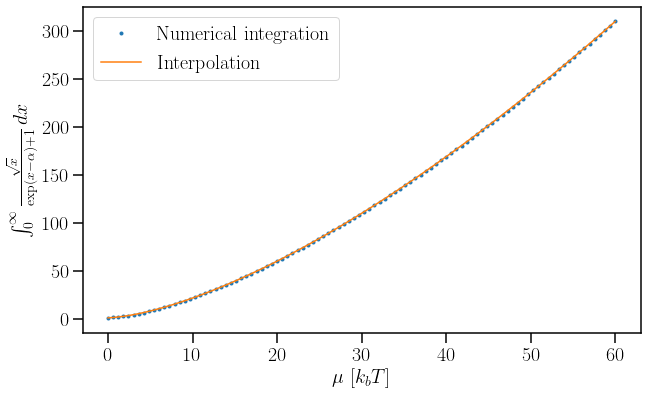

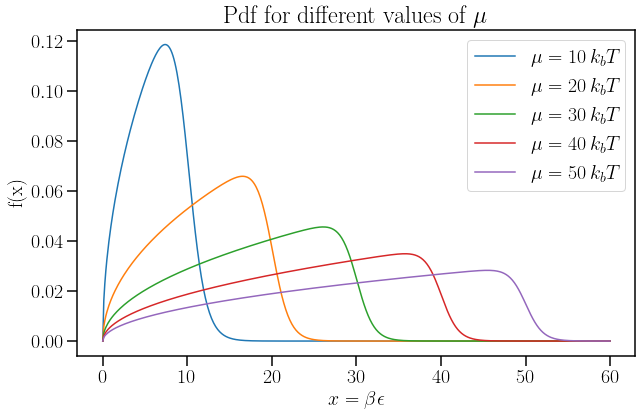

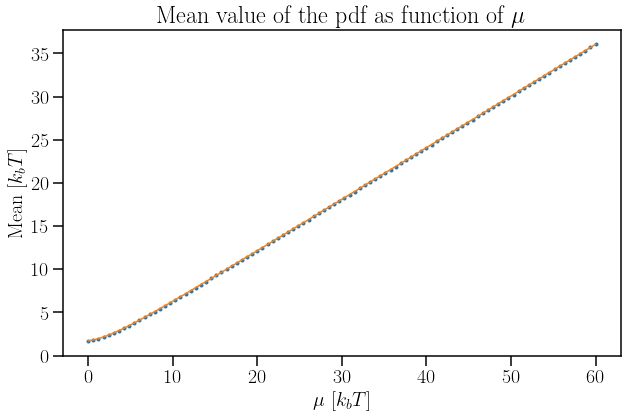

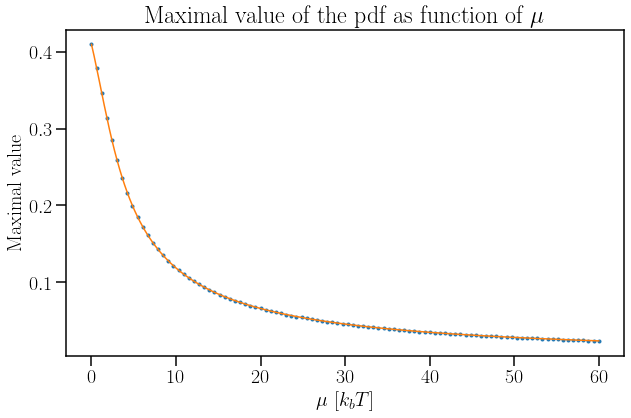

In [6]:
# Normalisation plot
plt.plot(alpha_list,norm_list,'.',label = 'Numerical integration')
xnew = np.linspace(alpha_min,alpha_max,200)
plt.plot(xnew,normFunc(xnew),label = 'Interpolation')
plt.ylabel(r'$\int_0^\infty\frac{\sqrt{x}}{\exp(x - \alpha)+1}\,dx$')
plt.xlabel(r'$\mu$ [$k_b T$]')
plt.legend()
plt.show()

# Pdf plots
alphas = np.arange(10,51,10)
xx = np.linspace(0,60,500)
for alpha in alphas:
    plt.plot(xx,pdf(xx,alpha),label=r'$\mu = %i \, k_b T$'%alpha)
del alpha
    
plt.title(r'Pdf for different values of $\mu$')
plt.xlabel(r'$x = \beta \epsilon$')
plt.ylabel(r'f(x)')
plt.legend()
plt.show()


# Mean value plot
plt.plot(alpha_list,pdf_mean_list,'.')
pdf_means = pdf_mean(xnew)
mean_max = pdf_means.max()
mean_min = pdf_means.min()
plt.plot(xnew,pdf_means)
plt.title(r'Mean value of the pdf as function of $\mu$')
plt.xlabel(r'$\mu$ [$k_b T$]')
plt.ylabel(r'Mean [$k_b T$]')
plt.show()

# Ymax  plot
plt.plot(alpha_list,pdf_ymax_list,'.')
plt.plot(xnew,pdf_ymax(xnew))
plt.title(r'Maximal value of the pdf as function of $\mu$')
plt.xlabel(r'$\mu$ [$k_b T$]')
plt.ylabel(r'Maximal value')
plt.show()

del xnew, xx, alphas, alpha_list, pdf_ymax_list, pdf_mean_list, norm_list, pdf_means

# Task 1 : Basic statistical properties

In [6]:
alpha1 = 30
xmax1 = alpha1 +10
ymax1 = pdf_ymax(alpha1)

$$f(x) = C\,\frac{\sqrt{x}}{e^{x - \alpha}+1}$$
$$x  = \beta\epsilon \hspace{1cm} \alpha = \beta\mu \hspace{1cm} C = \frac{A}{\sqrt{\beta}}$$

## a)

 We have that $f(x)>0$ for $x>0$ and $\int_0^\infty \frac{\sqrt{x}}{e^{x - \alpha}+1} dx \in \mathbb{R}$ so $f(x)$ is a pdf when normalized.

## b)

Number of data in =  54488
Efficicency =  0.54488


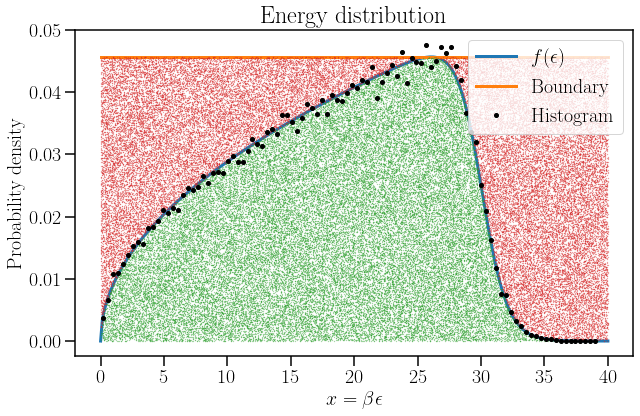

In [7]:
# Distribution plot
xx = np.linspace(0,xmax1,300)
plt.plot(xx,pdf(xx),label=r'$f(\epsilon)$',lw=3)

# Boudary function
plt.plot(xx,ymax1*np.ones_like(xx),lw=3,label='Boundary')
eff = 1/(xmax1*ymax1)

#Monte Carlo generation (More complete for the plot)
Nevents1 =int(1e5)
xi = np.random.rand(Nevents1)*xmax1
yi = np.random.rand(Nevents1)*ymax1
accepted  = (yi<=pdf(xi))
i_in = accepted.nonzero()
i_out = (1-accepted).nonzero()
plt.plot(xi[i_in],yi[i_in],'.',alpha=0.7,ms=0.5)
plt.plot(xi[i_out],yi[i_out],'.',alpha=0.7,ms=0.5)
data1 = xi[i_in]
print('Number of data in = ',len(data1))
print('Efficicency = ',len(data1)/Nevents1)

nbins = 100
hist,bins= np.histogram(data1,nbins,density=True)
plt.plot(bins[:-1]+(bins[-1]/nbins)/2,hist,'ok',ms=4,label='Histogram')


plt.title("Energy distribution")
plt.xlabel(r'$x = \beta\epsilon$')
plt.ylabel(r"Probability density")
plt.legend()
plt.show()

del xx, eff, xi, yi, accepted, i_in, i_out, nbins, hist, bins

## c)

As seen in the properties of the pdf, the 

In [8]:
mean1 = data1.sum()/len(data1)
mean_th = 3/5 * alpha1
print('E(energy) = %0.2f k_b T'%mean1)
print('Theorical estimation = %0.2f k_b T'%mean_th)
print('Relative difference = %0.2f'%np.abs(1-mean1/mean_th))
del mean_th

E(energy) = 18.15 k_b T
Theorical estimation = 18.00 k_b T
Relative difference = 0.01


## d) ?

## e)

In [9]:
var1 = np.var(data1)
skew1 = stats.skew(data1)
kurt1 = stats.kurtosis(data1)

pdfmean = quad(lambda x:x*pdf(x),0,60)[0] #mu1
pdfvar = quad(lambda x:(x-pdfmean)**2*pdf(x),0,60)[0] #mu2
pdfmu3 = quad(lambda x:(x-pdfmean)**3*pdf(x),0,60)[0]
pdfmu4 = quad(lambda x:(x-pdfmean)**4*pdf(x),0,60)[0]
pdfskew= pdfmu3/np.power(pdfvar,3/2)
pdfkurt = pdfmu4/pdfvar**2 - 3

print("Mean     = %0.3f \t Expected = %0.3f"%(mean1,pdfmean),
      "\nVariance = %0.3f \t Expected = %0.3f"%(var1,pdfvar),
      "\nSkewness = %0.3f \t Expected = %0.3f"%(skew1,pdfskew),
      "\nKurtosis = %0.3f \t Expected = %0.3f"%(kurt1,pdfkurt))

Mean     = 18.149 	 Expected = 18.098 
Variance = 64.248 	 Expected = 63.796 
Skewness = -0.291 	 Expected = -0.284 
Kurtosis = -0.916 	 Expected = -0.916


# Task 2 : Convergence

## a)

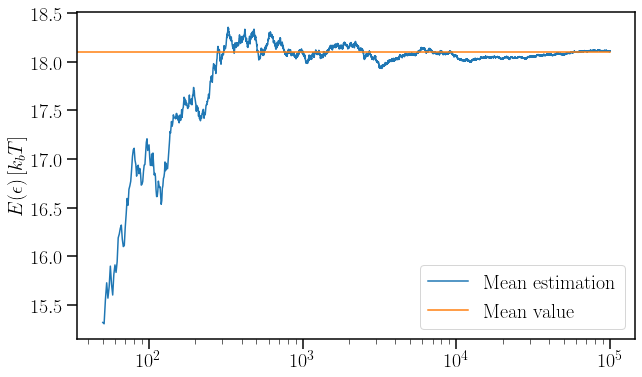

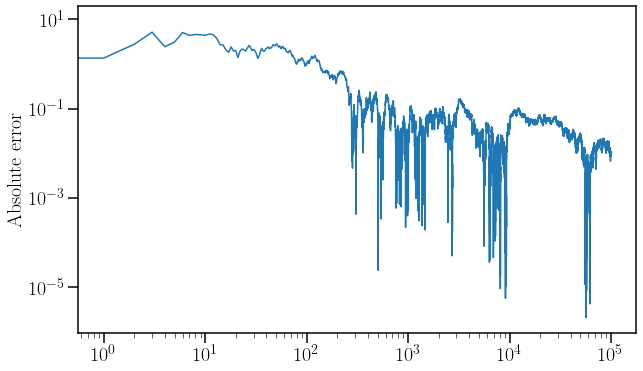

In [19]:
data2 = MCgenFix(int(1e5))
mean_n= np.cumsum(data2)/(np.arange(len(data2))+1)

nmin = int(5e1)
plt.semilogx(np.arange(nmin,len(mean_n)),mean_n[nmin:],label="Mean estimation")
plt.plot([0,len(data2)],pdfmean*np.ones(2),label='Mean value')
plt.ylabel(r'$E(\epsilon)\,[k_b T]$')

plt.legend()
plt.show()

abserror = abs(mean_n - pdfmean)
plt.loglog(abserror)
plt.ylabel('Absolute error')
plt.show()

## b)

In [20]:
Nexp2 = int(1e5)
Nevents2 = int(1e3)
mean_events2 = np.array([MCgenFix(Nevents2).mean() for exp in range(Nexp2)])

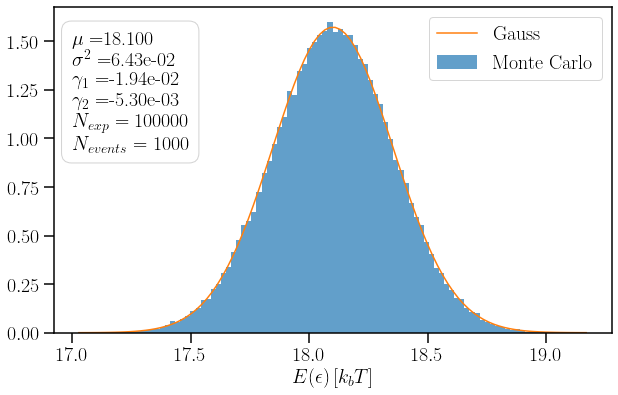

In [21]:
mean2 = mean_events2.mean()
var2 = mean_events2.var()
skew2 = stats.skew(mean_events2)
kurt2 = stats.kurtosis(mean_events2,fisher=True)


plt.hist(mean_events2,100,density=True,label='Monte Carlo',alpha = 0.7 )
plt.figtext(0.15,0.55, '$\mu = $%0.3f'%mean2+
            '\n$\sigma^2 = $%0.2e'%var2+
            '\n$\gamma_1 = $%0.2e'%skew2+
            '\n$\gamma_2 = $%0.2e'%kurt2+
            '\n$N_{exp} = %i$'%Nexp2+
            '\n$N_{events} = %i$'%Nevents2
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

xx = np.linspace(mean_events2.min(),mean_events2.max(),100)
plt.plot(xx,gauss(xx,mean2,np.sqrt(var2)), label = 'Gauss')

plt.xlabel(r'$E(\epsilon)\, [k_b T]$')
plt.legend()
plt.show()

del xx

## c) 

According to the Central Limit Theorem, the mean of a sequence of $N$ random variables with mean $\mu$ and variance $\sigma^2$ converges to a normal distribution with mean $\mu$ and variance $\sigma^2/N$

In [22]:
var_th = pdfvar/Nevents2
var_relerror = 1-var2/var_th
print(var_relerror)

-0.008193381601467431


# Task 3 : $\chi^2$ distributions

## a )

The pdf for the number of entrance per bin follows a binomial distribution with $p$ being the probability that an event is in this bin. This probability can be approximated by $p \simeq bin_{width}\cdot pdf(bin_{center})$.
The expected value of events in a bin is $N_{events}\cdot p$ and it's variance is $N_{events}\cdot p\,(p-1)$.

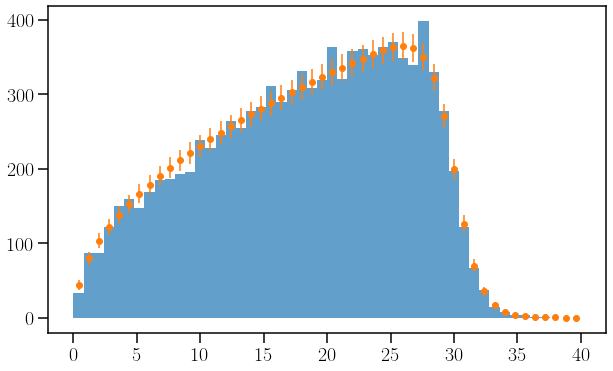

In [32]:
Nevents3 = int(1e4)

#  Bins properties
nbin = 50
bins = np.linspace(0,xmax1,nbin+1)
binWidth = xmax1/nbin
binx = np.arange(nbin)*binWidth + binWidth/2

# Probability that an event is in a given been 
p_inbin = np.array([quad(pdf,bins[i],bins[i+1])[0] for i in range(nbin)])

data3 = MCgenFix(Nevents3)

num = plt.hist(data3,bins,alpha=0.7)[0]
expected_num = Nevents3*p_inbin
var_num = Nevents3*p_inbin*(1-p_inbin)
plt.errorbar(binx,expected_num,np.sqrt(var_num),fmt='o')

del nbin, bins, binWidth, binx, p_inbin, num, expected_num, var_num

## b) c)

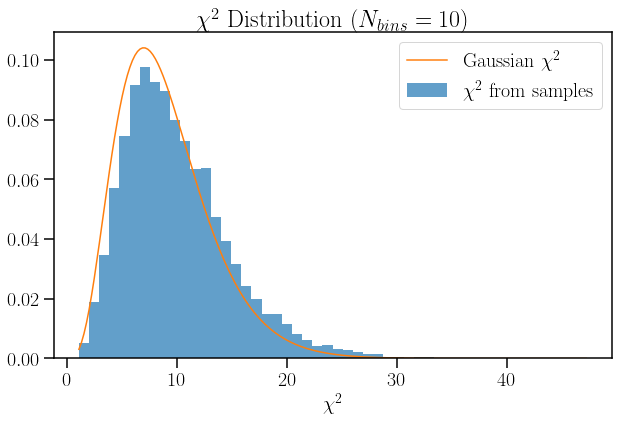

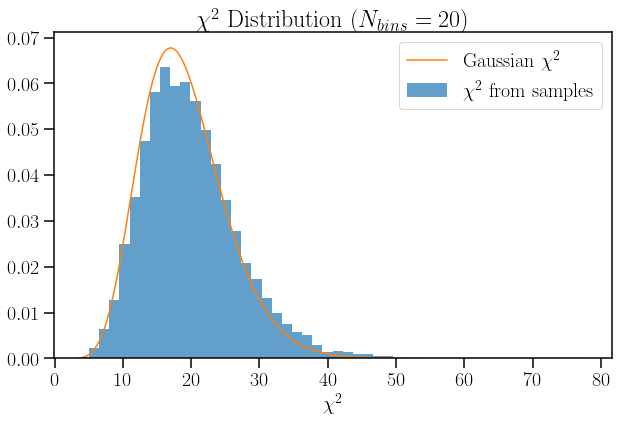

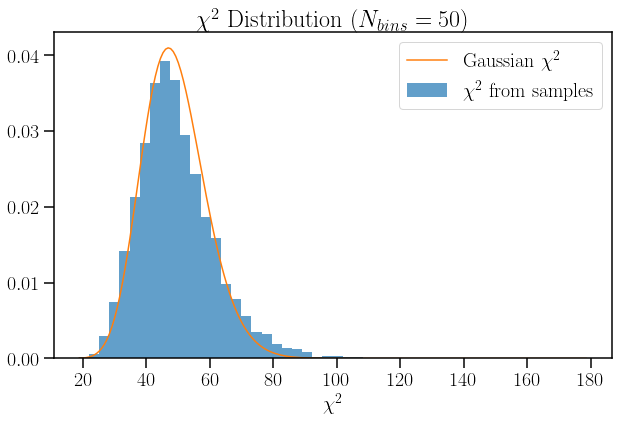

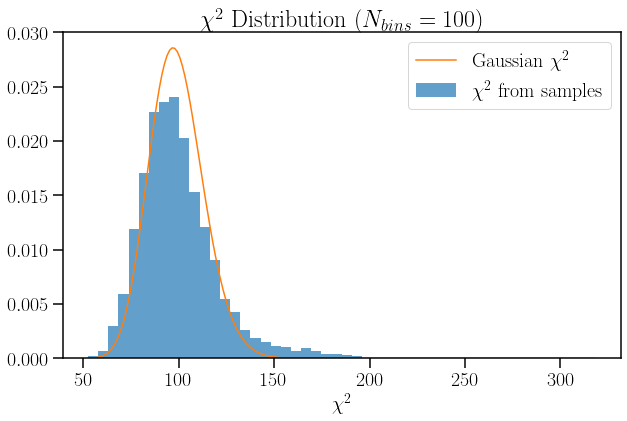

In [29]:
Nexp3 = int(1e4)

nbins = [10,20,50,100]
for nbin in nbins:
    #Bins properties
    bins = np.linspace(0,xmax1,nbin+1)
    binWidth = xmax1/nbin
    binx = np.arange(nbin)*binWidth + binWidth/2

    #Statistics of the number of events per bin
    p_inbin = np.array([quad(pdf,bins[i],bins[i+1])[0] for i in range(nbin)])
    expected_num = Nevents3*p_inbin
    var_num = Nevents3*p_inbin*(1-p_inbin)
   
    #Generate chi^2 pdf from Nexp>>1
    chi2s = np.zeros(Nexp3)
    for n in range(Nexp3):
        data = MCgenFix(Nevents3)
        num = np.histogram(data,bins)[0]
        chi2s[n] = chi2(num,expected_num,var_num)
        
    #Plot histograms
    plt.hist(chi2s,50,density=True,alpha=0.7,label = "$\chi^2$ from samples")
    xChi = np.linspace(chi2s.min(),chi2s.max(),200)
    yChi = stats.chi2.pdf(xChi, df = nbin-1,)
    plt.plot(xChi,yChi,label = "Gaussian $\chi^2$ ")

 
    plt.title("$\chi^2$ Distribution  ($N_{bins} = %i)$"%nbin)
    plt.xlabel("$\chi^2$")
    plt.legend()
    plt.show()

# Task 4 :  Parameter estimation

In [7]:
# Data set 
N4 = int(1e3)
nbins4 = 50
alpha4 = 30
data4 = MCgenFix(N4,alpha = alpha4)

## a) Maximum Likelihood Method

In [8]:
def logLH(par,data):
    return -np.log(pdf(data,par)).sum()

     fun: 3383.357335208664
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 29.830195497091662


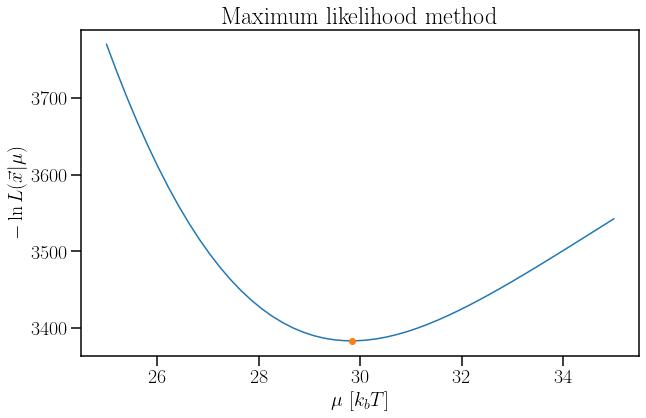

In [9]:
par_list = np.linspace(25,35,50)
logLH_list = np.array([logLH(par,data4) for par in par_list])
plt.plot(par_list,logLH_list)

par_a = minimize_scalar(lambda x: logLH(x,data4), method = 'bounded', bounds = [alpha_min,alpha_max])
print(par_a)
plt.plot(par_a.x,par_a.fun,'o')

plt.title(r'Maximum likelihood method')
plt.ylabel(r'$-\ln L(\vec{x}|\mu)$')
plt.xlabel(r'$\mu$ [$k_b T$]')
plt.show()

del logLH_list, par_a, par_list

## b) Least Square Method

In [10]:
def leastSquare(par,num,bins):
    #Bins properties
    N = len(num)
    binWidth = bins[1]-bins[0]
    binx = bins[:-1] + binWidth/2

    #Statistics of the number of events per bin
    #p_inbin = np.array([quad(lambda x : pdf2(x,par),bins[i],bins[i+1])[0] for i in range(nbin)])
    p_inbin = binWidth*pdf(binx,par)  # Approximation
    expected_num = N*p_inbin
    var_num = N*p_inbin*(1-p_inbin) 
      
    return chi2(num,expected_num,var_num)

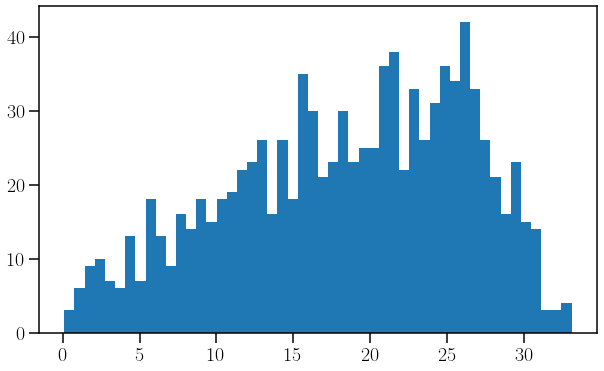

     fun: 19615.178459757175
    nfev: 18
     nit: 14
 success: True
       x: 29.976680121233915


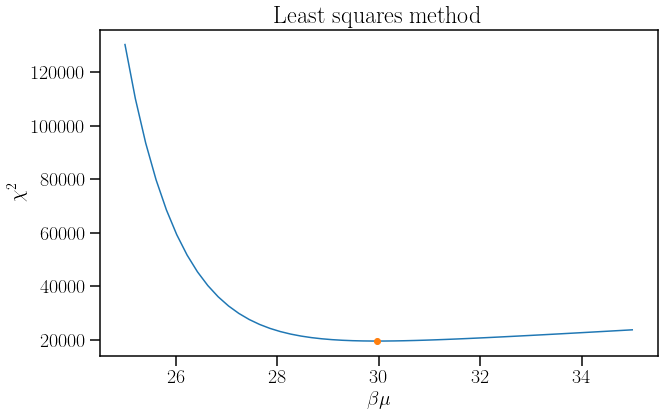

In [11]:
data_num, data_bins = plt.hist(data4,nbins4)[:2]
plt.show()

par_list = np.linspace(25,35,50)
chi2_list = np.array([leastSquare(par,data_num,data_bins) for par in par_list])
plt.plot(par_list,chi2_list)

par_b = minimize_scalar(lambda x: leastSquare(x,data_num,data_bins),[25,35])
print(par_b)
plt.plot(par_b.x,par_b.fun,'o')

plt.title(r'Least squares method')
plt.ylabel(r'$\chi^2 $')
plt.xlabel(r'$\beta\mu$')
plt.show()

del par_list, chi2_list, data_num, data_bins

## c) Moments Method

For this method we can use the inverse relation of the mean as function of $\mu$

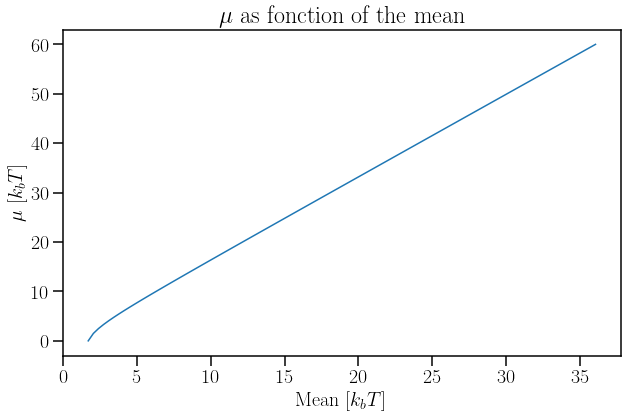

In [122]:
xx = np.linspace(mean_min,mean_max,100)
plt.plot(xx, pdf_mean_inv(xx))
plt.title(r'$\mu$ as fonction of the mean')
plt.ylabel(r'$\mu$ [$k_b T$]')
plt.xlabel(r'Mean [$k_b T$]')
plt.show()

In [123]:
mean_c = data4.mean()
par_c = pdf_mean_inv(mean_c)
print(par_c)

30.60137774269786


## d) Compare

In [15]:
Nexp4 = int(1e4)
par_na = np.zeros(Nexp4)
par_nb = np.zeros(Nexp4)
par_nc = np.zeros(Nexp4)

for n in range(Nexp4):
    #Data generation
    data = MCgenFix(N4,alpha=alpha4)
    
    #Maximum likelihood
    par_na[n] = minimize_scalar(lambda x: logLH(x,data), method = 'bounded', bounds = [alpha_min,alpha_max]).x
    
    #Least Square
    num, bins = np.histogram(data,nbins4)[:2]
    par_nb[n] = minimize_scalar(lambda x: leastSquare(x,num,bins), method = 'Bounded', bounds = [alpha_min,alpha_max]).x
    
    #Moments
    par_nc[n] = pdf_mean_inv(data.mean())
    
del n, data, num, bins

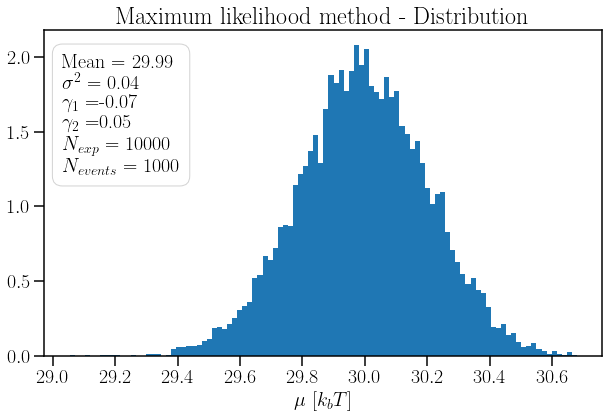

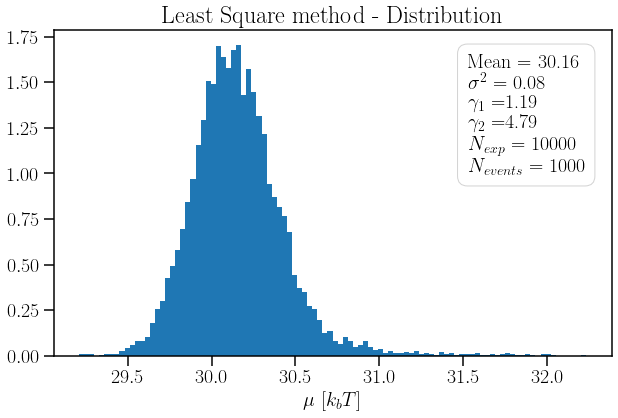

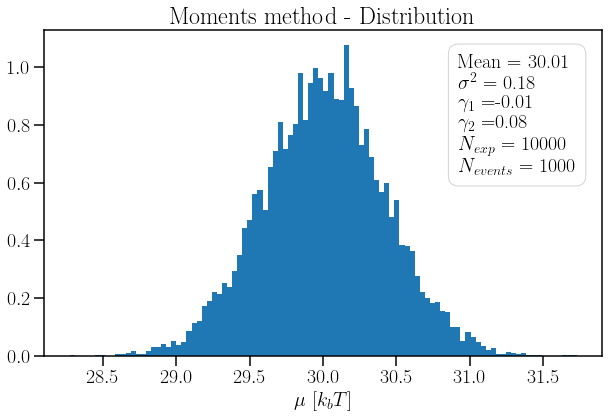

In [19]:
methods = ['Maximum likelihood', 'Least Square', 'Moments']
par_lists = [par_na, par_nb, par_nc]
xpos = [0.15,0.7,0.7]

for i in range(3):
    plt.hist(par_lists[i],100,density=True)
    plt.figtext(xpos[i],0.55,
            'Mean = %0.2f'%par_lists[i].mean()+
            '\n$\sigma^2 =$ %0.2f'%par_lists[i].var()+
            '\n$\gamma_1 = $%0.2f'%stats.skew(par_lists[i])+
            '\n$\gamma_2 = $%0.2f'%stats.kurtosis(par_lists[i])+
            '\n$N_{exp} =$ %i'%Nexp4+
            '\n$N_{events} = %i$'%N4
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

    plt.title(r"%s Method - Distribution"%methods[i])
    plt.xlabel(r'$\mu$ [$k_b T$]')
    plt.show()

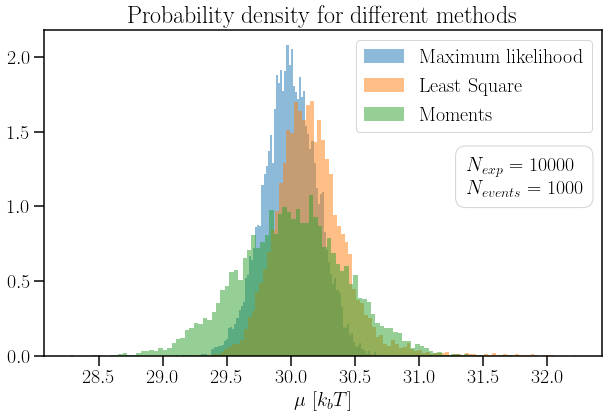

In [24]:
for i in range(3):
    plt.hist(par_lists[i],100,density=True,alpha=0.5,label = methods[i])

plt.figtext(0.71,0.5,
            '$N_{exp} =$ %i'%Nexp4+
            '\n$N_{events} = %i$'%N4
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

plt.title('Probability density for different methods')
plt.xlabel(r'$\mu$ [$k_b T$]')
plt.legend()
plt.show()

# Task 5 :  Hypothese testing

Text(0.5, 1.0, 'Cumulative probability')

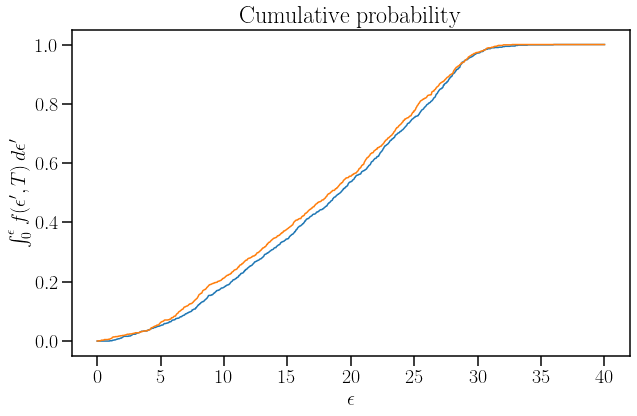

In [32]:
N5=1000
data_1 = np.sort(MCgenFix(N5))  #Generate the data and sort it.
data_2 = np.sort(MCgenFix(N5))
data_conc = np.sort(np.concatenate((data_1, data_2)))

x = np.linspace(0,40,len(data_1))

# Compute the cumulative function using scipy "percentileofscore"

data_1_cum = [stats.percentileofscore(data_1, i)/100 for i in x]
data_2_cum = [stats.percentileofscore(data_2, i)/100 for i in x]

plt.plot(x,data_1_cum, label = "Data 1")
plt.plot(x,data_2_cum, label = "Data 2")

plt.xlabel("$\epsilon$")
plt.ylabel("$\int_0^{\epsilon} f(\epsilon',T) \,d\epsilon'$")
plt.title("Cumulative probability")


In [33]:
# Compute the (absolute difference) : 

data_diff = np.abs(np.subtract(data_1_cum, data_2_cum))
#print('data_diff:\n{}'.format(data_diff))

# Compute the max difference :
max_diff = max(data_diff)
max_diff

0.038000000000000006

In [34]:
# Trying to use directly the 2-sample Kolmogorov test from scipy.stats:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
# https://stackoverflow.com/questions/39132469/how-to-interpret-scipy-stats-kstest-and-ks-2samp-to-evaluate-fit-of-data-t?rq=1

D_statistics, p_value = stats.ks_2samp(data_1,data_2) #D_statistics is the absolute max distance between the two samples

print('D_stats is :\n{}'.format(D_statistics), '\np_value is:\n{}'.format(p_value))

D_stats is :
0.039 
p_value is:
0.43260886958153144


In [37]:
alpha = [0.20, 0.15, 0.10, 0.05, 0.025, 0.01, 0.005, 0.001]
c_alpha = [1.073, 1.138, 1.224, 1.358, 1.628, 1.731, 1.949]

crit_value = []

for i in range(len(alpha)):
    crit = np.sqrt(-np.log(alpha[i]/2)*1/N5)
    crit_value.append(np.round(crit,3))
print(crit_value)

# We then use that the null hypothesis (which is set as default as : "The two samples originate from the same distribution") is REJECTED if D_stats > values from wikipedia (https://en.m.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)
for i in range(len(alpha)):
    if D_statistics > crit_value[i]:
        print('The null hypothesis is rejected at the level:\n{}'.format(alpha[i]))
    else : 
        print('We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:\n{}'.format(alpha[i]))

[0.048, 0.051, 0.055, 0.061, 0.066, 0.073, 0.077, 0.087]
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.2
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.15
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.1
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.05
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.025
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.01
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.005
We cannot reject the null hypothesis that the two datasets originate from the same distribution at level:
0.001


In [39]:
# Generalizing for Nexp = 100
Nexp5 = 100
i = 1
max_dist =[]
pList = []

while i <= Nexp5 :     
    data_1 = np.sort(MCgenFix(N5))
    data_2 = np.sort(MCgenFix(N5))    
    D_stat, p_value = stats.ks_2samp(data_1, data_2)
    max_dist.append(D_stat)    
    pList.append(p_value)
    i = i+1

In [40]:
# We can compare each of the D_stat value (for each exp) with the 95% confidence level (obtained by using the function we defined before):
# We use the percentileofscore function to see how many (in percentage) are below this value :

print('Crit value for alpha = 0.05 is :\n{}'.format(crit_value[3]))
percentile = stats.percentileofscore(max_dist, crit_value[3])

print('There are', percentile, "% of d <= crit_value : which means that in",percentile , "% of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.")

Crit value for alpha = 0.05 is :
0.061
There are 98.0 % of d <= crit_value : which means that in 98.0 % of the cases, we cannot reject the null hypothesis that the two datasets originate from the same distribution, at confidence level 95%.


[]

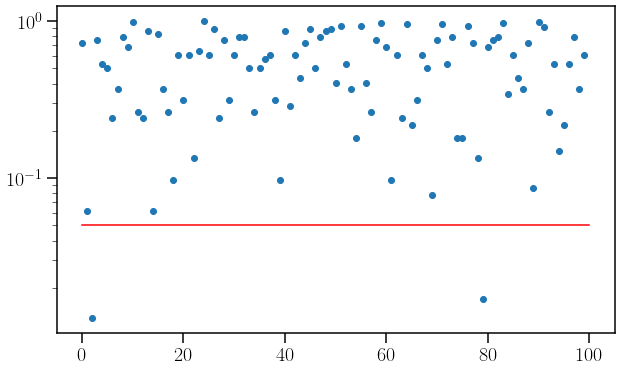

In [44]:
plt.scatter(range(len(pList)),pList)
plt.plot([0,100],[0.05,0.05], color = "red")
plt.semilogy()

In [45]:
t = np.array(pList)[np.array(pList)<0.05]
print(str("{:.1f}".format(100*(1-len(t)/200))))


99.0


# Task 6

In [139]:
# The function generates exactly N events with systematics errors
def MCgenErrors(N, xmin = 0, xmax = -1, alpha = 30, err=2):
    if xmax == -1:
        xmax = alpha+10
    ymax = pdf_ymax(alpha)
    p = 1/((xmax-xmin)*ymax) # Probability that an event is recorded
    Nrand = int(N/(p-0.02)) 
    ok = False
    while ok == False:
        x = np.random.rand(Nrand)*(xmax-xmin) + xmin
        y = np.random.rand(Nrand)*ymax
        data = x[np.where(y<=pdf(x))]
        data += np.random.normal(0,err,len(data))
        data = data[np.where(data>0)] # We don't accept negative values
        if len(data)>=N:
            ok = True
    data = data[:N] 
    return data

In [142]:
N6 = int(1e4)
Nexp6 = int(1e4)
err = 2

par_n6a = np.zeros(Nexp6)
par_n6b = np.zeros(Nexp6)
par_n6c = np.zeros(Nexp6)

for n in range(Nexp6):
    #Data generation
    data = MCgenErrors(N6,alpha=alpha4,err = err)
    
    #Maximum likelihood
    par_n6a[n] = minimize_scalar(lambda x: logLH(x,data), method = 'bounded', bounds = [alpha_min,alpha_max]).x
    
    #Least Square
    num, bins = np.histogram(data,nbins4)[:2]
    par_n6b[n] = minimize_scalar(lambda x: leastSquare(x,num,bins), method = 'Bounded', bounds = [alpha_min,alpha_max]).x
    
    #Moments
    par_n6c[n] = pdf_mean_inv(data.mean())
    
del n, data, num, bins

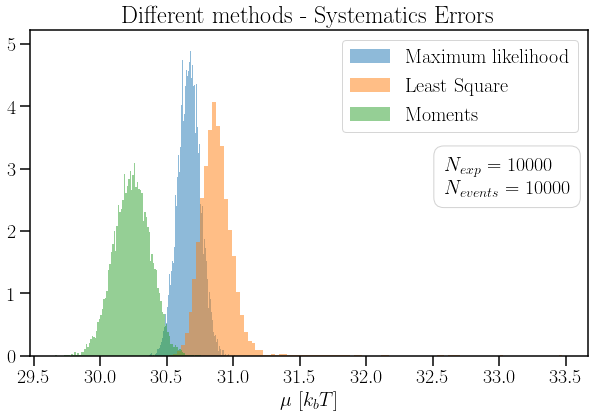

In [150]:
methods = ['Maximum likelihood', 'Least Square', 'Moments']
par_lists = [par_n6a, par_n6b, par_n6c]
xpos = [0.15,0.7,0.7]

for i in range(3):
    plt.hist(par_lists[i],100,density=True,alpha=0.5,label = methods[i])

plt.figtext(0.7,0.5,
            '$N_{exp} =$ %i'%Nexp6+
            '\n$N_{events} = %i$'%N6
            ,bbox=dict(facecolor='white', edgecolor='lightgrey', boxstyle='round', pad=0.5))

plt.title('Different methods - Systematics Errors')
plt.xlabel(r'$\mu$ [$k_b T$]')
plt.legend()
plt.show()